# Positional encoding

Test out some alternatives to achieve positional encoding, as per [this](https://pyimagesearch.com/2022/09/26/a-deep-dive-into-transformers-with-tensorflow-and-keras-part-2/) blog post.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Binary encoding

In [25]:
n = 100
dims = 100

bin_box = np.zeros(shape=(n, dims))

for i in range(n):
    # Get the binary representation of the index (skipping
    # the first two entries which indicate the binary encoding).
    # The output is a string.
    binary_repr = bin(i)[2:]

    # Append the number of 0s to the string so that the result
    # has length dims (0-padding on the right).
    b = binary_repr.ljust(dims, '0')
    
    # Populate the i-th row of the representation matrix
    # with the 0-padded binary representation of i, with each
    # digit converted to an integer.
    bin_box[i] = [int(x) for x in b]

Text(0, 0.5, 'Numbers')

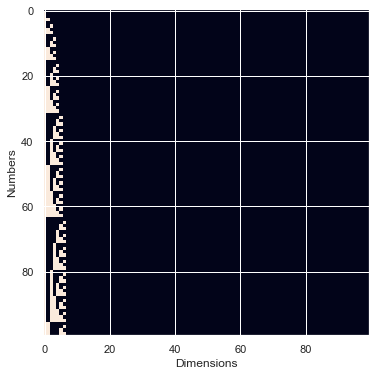

In [26]:
# Show the binary representation matrix as an image (array
# of pixels).
fig = plt.figure(figsize=(14, 6))

plt.imshow(bin_box)

plt.xlabel('Dimensions')
plt.ylabel('Numbers')

The above procedure achieves positional encoding as every value of the index (position in the sequence) is mapped to a binary sequence (0-padded sequence of 0s and 1s based on the binary encoding of the index value).

**Note:** this follows the blog post, but the encoding is not unique...

## "Trigonometric" (or "sinusoidal") encoding

In [54]:
def get_angle(p, i, d_model):
    """
    Computes the angle that enters the sin or cos
    function for component i of the encoding of
    position p.
    """
    angle = p / (1e3 ** (2. * i / d_model))
    
    return angle


def get_positional_encoding(p, d_model):
    """
    Computes the positional encoding vector for position
    p and d_model model dimension.
    """
    indices = np.arange(d_model)
    
    angles = get_angle(p, indices, d_model)
    
    pos_encoding = np.zeros(d_model)
    
    pos_encoding[::2] = np.sin(angles[::2])
    pos_encoding[1::2] = np.cos(angles[1::2])
    
    return pos_encoding

In [57]:
d_model = 100

sequence_length = 100

pos_encoding = np.array([
    get_positional_encoding(position, d_model)
    for position in range(sequence_length)
])

pos_encoding

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.41470985e-01,  6.44089748e-01,  6.87889724e-01, ...,
         1.00000000e+00,  1.31825674e-06,  1.00000000e+00],
       [ 9.09297427e-01, -1.70296792e-01,  9.98561657e-01, ...,
         1.00000000e+00,  2.63651348e-06,  1.00000000e+00],
       ...,
       [ 3.79607739e-01, -9.42910161e-01, -9.70039598e-01, ...,
         9.99999989e-01,  1.27870903e-04,  9.99999994e-01],
       [-5.73381872e-01, -8.62083190e-01, -8.71190152e-01, ...,
         9.99999989e-01,  1.29189160e-04,  9.99999994e-01],
       [-9.99206834e-01, -1.67607729e-01, -2.94606539e-01, ...,
         9.99999989e-01,  1.30507417e-04,  9.99999994e-01]])

Text(0, 0.5, 'Numbers')

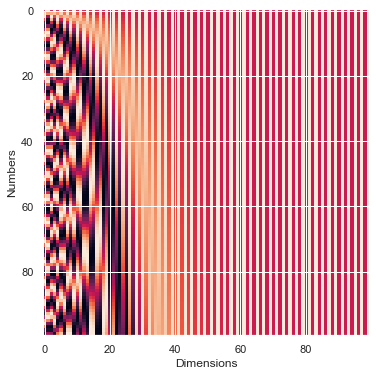

In [58]:
# Show the representation matrix as an image (array
# of pixels).
fig = plt.figure(figsize=(14, 6))

plt.imshow(pos_encoding)

plt.xlabel('Dimensions')
plt.ylabel('Numbers')